In [1]:
import sys; sys.path.insert(0, '../geoplot')
import geoplot as gplt
import geoplot.crs as ccrs
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from shapely.geometry import Point

cdata = pd.read_csv("../geoplot/data/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return Point(0, 0)
    else:
        return Point(long, lat)

collisions = gpd.GeoDataFrame(cdata.head(10000), geometry=cdata.head(10000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

latmax, latmin, longmax, longmin = collisions['LATITUDE'].max(), collisions['LATITUDE'].min(),\
                                   collisions['LONGITUDE'].max(), collisions['LONGITUDE'].min()

def genpattern(srs):
    return (srs['LATITUDE'] - latmin) / (latmax - latmin)

collisions['LATDEP'] = collisions.apply(genpattern, axis='columns')

del cdata

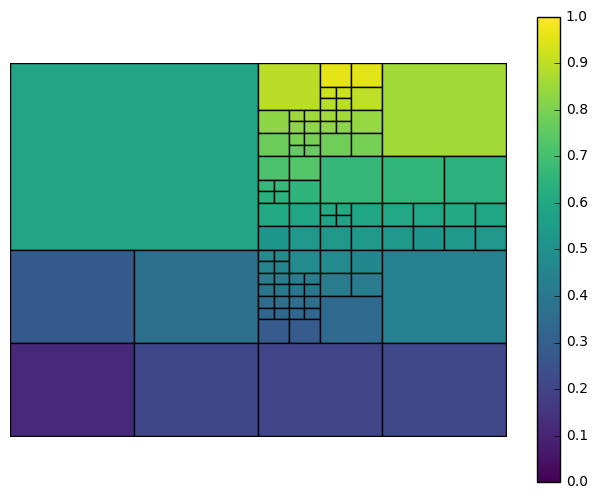

In [4]:
gplt.aggplot(collisions, projection=ccrs.PlateCarree(), hue='LATDEP')

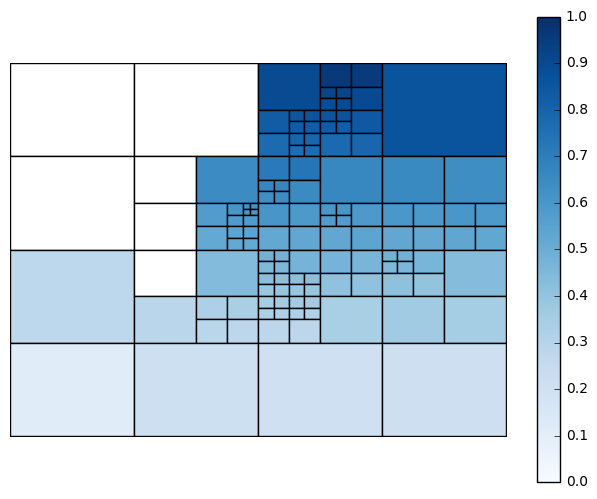

In [5]:
gplt.aggplot(collisions, nmin=20, nmax=500, projection=ccrs.PlateCarree(), hue='LATDEP', cmap='Blues')

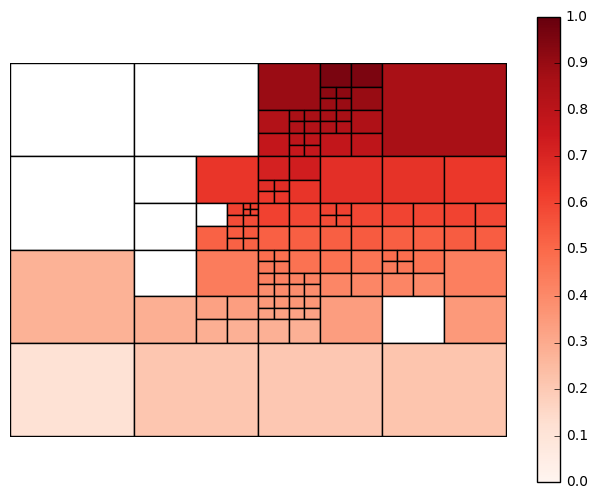

In [6]:
gplt.aggplot(collisions, nmin=20, nmax=500, nsig=5, projection=ccrs.PlateCarree(), hue='LATDEP', cmap='Reds')

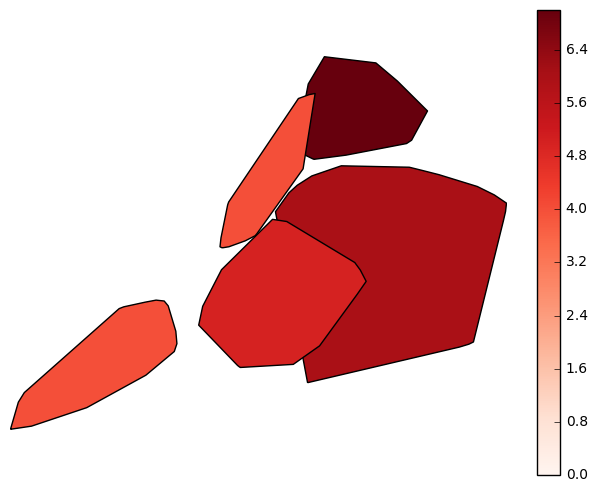

In [7]:
gplt.aggplot(collisions, projection=ccrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             by='BOROUGH', agg=np.max)

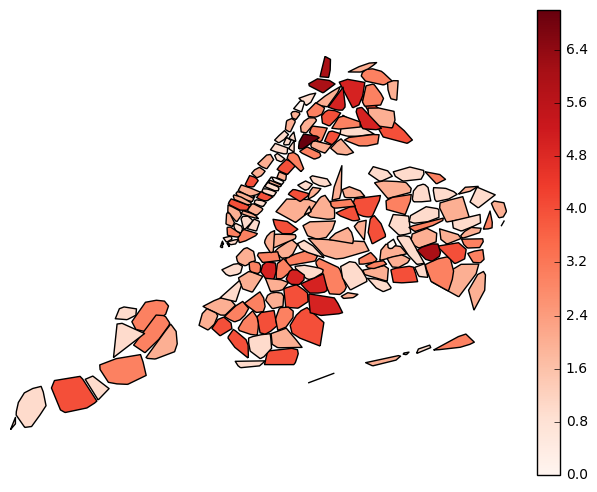

In [8]:
gplt.aggplot(collisions, projection=ccrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             by='ZIP CODE', agg=np.max)

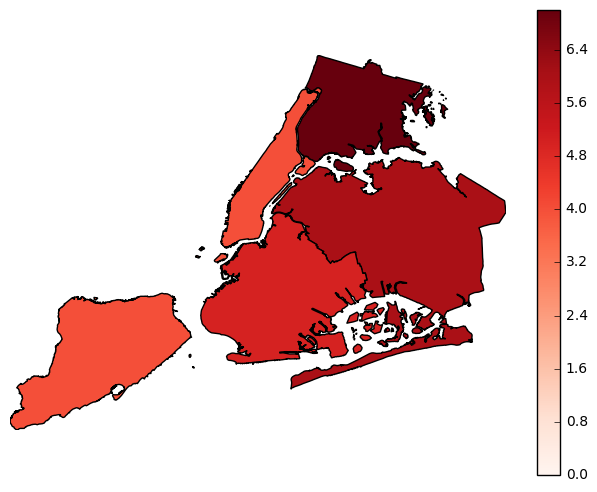

In [43]:
boroughs = gpd.read_file("../geoplot/data/nyc_boroughs/boroughs.geojson")
boroughs_2 = boroughs.set_index('BoroName')
boroughs_2.index = [b.upper() for b in boroughs_2.index]
gplt.aggplot(collisions, projection=ccrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             geometry=boroughs_2, by='BOROUGH', agg=np.max)

# Scrap for later

In [92]:
manhattan = gpd.read_file("../geoplot/data/manhattan_mappluto/MNMapPLUTO.shp")

In [93]:
manhattan['YearBuilt'] = manhattan['YearBuilt'].replace(0, np.nan)
manhattan = manhattan[['geometry', 'YearBuilt']].dropna()

In [94]:
manhattan = manhattan.to_crs(epsg=4326)

In [95]:
manhattan = manhattan.reset_index(drop=True)

In [101]:
manhattan = manhattan.reset_index().rename(columns={'index': 'n'})

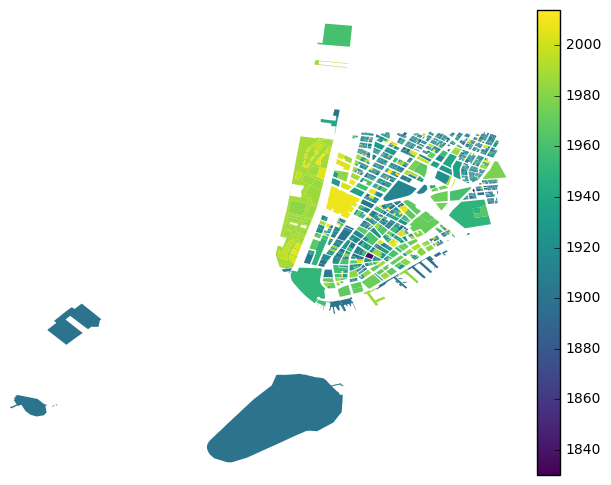

In [117]:
gplt.aggplot(manhattan.head(1500),
             projection=ccrs.PlateCarree(), 
             geometry=manhattan.geometry.head(1500), 
             by=pd.Series(manhattan.index),
             hue='YearBuilt',
             linewidth=0,
             extent=(-74.020171, -73.999872, 40.699886, 40.710003))

In [137]:
len(manhattan)

40319

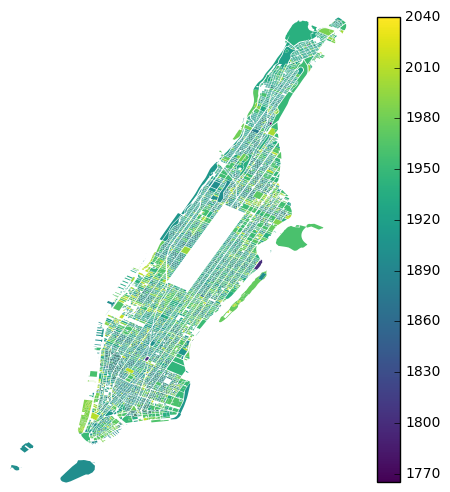

In [116]:
gplt.aggplot(manhattan,
             projection=ccrs.PlateCarree(), 
             geometry=manhattan.geometry,
             by=pd.Series(manhattan.index),
             hue='YearBuilt',
             linewidth=0)

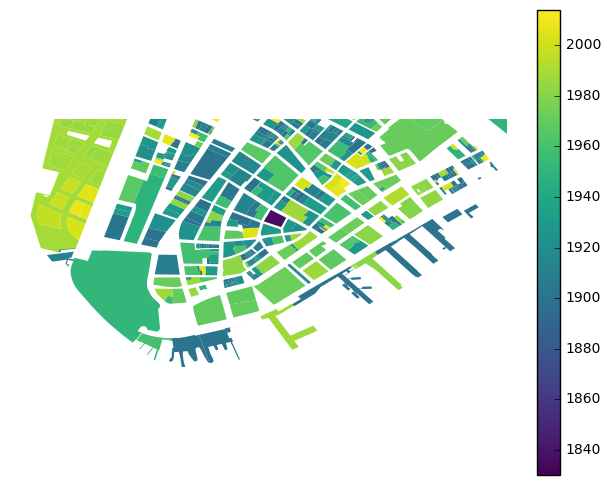

In [118]:
gplt.aggplot(manhattan.head(1500),
             projection=ccrs.PlateCarree(), 
             geometry=manhattan.geometry.head(1500), 
             by=pd.Series(manhattan.index),
             hue='YearBuilt',
             linewidth=0,
             extent=(-74.020171, -73.999872, 40.699886, 40.710003))